# DL with PyTorch

## Basics of tensors in PyTorch

### Creating Tensors

In [1]:
import torch
import numpy as np
import pandas as pd
a = torch.FloatTensor(3, 2)
a.zero_()
#a.cuda()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

### Multiply numpy arrays and tensors

In [2]:
# numpy array multiplcations
a1 = np.array([[1,2,3],[4,5,6]]) #array 2 x 3
a2 =  np.array([[1,2,3],[4,5,6]]) #array 2 x 3
#element wise product
print('Element wise product of a1 and a2 np arrays shape: ',(a1 * a2).shape)
a3 = np.array([[1,2],[3,4], [5,6]]) #array 3 x 2
#Matrix product
print('a1 shape:', a1.shape, ' - a2 shape:', a2.shape)
print(' The product of a1 x a3 is: ')
a1.dot(a3)

Element wise product of a1 and a2 np arrays shape:  (2, 3)
a1 shape: (2, 3)  - a2 shape: (2, 3)
 The product of a1 x a3 is: 


array([[22, 28],
       [49, 64]])

In [29]:
# pytorch tensor multiplcations
t1 = torch.tensor([[1,2,3],[4,5,6]])
t2 = torch.tensor([[1,2,3],[4,5,6]])
(t1*t2).shape
t3 =  torch.tensor([[1,2],[3,4], [5,6]])
#matrix like product of t1 and t3
t1.mm(t3)

tensor([[22, 28],
        [49, 64]])

### Scalar Tensors

In [12]:
a = torch.tensor([1,2,3]) 
a
s = a.sum() #sum all tesor's elements
s #producing zero dimentioal tesnor with one element
s.item() #fetching the element as a scalar
#torch.tensor(1) 

6

### GPU Tensors
PyTorch transparently supports CUDA GPUs, which means that all operations have two versions—CPU and GPU—which are automatically selected. The decision is made based on the type of tensors that you are operating on. Every tensor type that we mentioned is for CPU and has its GPU equivalent. The only difference is that GPU tensors reside in the torch.cuda package, instead of just torch. For example, torch.FloatTensor is a 32-bit float tensor which resides in CPU memory, but torch.cuda.FloatTensor is its GPU counterpart. To convert from CPU to GPU, there is a tensor method, to(device), which creates a copy of the tensor to a specified device (which could be CPU or GPU). If the tensor is already on the device, nothing happens and the original tensor will be returned. Device type can be specified in different ways. First of all, you can just pass a string name of the device, which is "cpu" for CPU memory or "cuda" for GPU. A GPU device could have an optional device index specified after the colon, for example, the second GPU card in the system could be addressed by "cuda:1" (index is zero-based).

Another slightly more efficient way to specify a device in the to() method is using the torch.device class, which accepts the device name and optional index. For accessing the device that your tensor is currently residing in, it has a device property.

In [9]:
a = torch.FloatTensor([2,3])
a
ca = a.cuda()
ca

a + 1 
ca + 1 
ca.device


RuntimeError: cuda runtime error (35) : CUDA driver version is insufficient for CUDA runtime version at /opt/conda/conda-bld/pytorch_1532579805626/work/aten/src/THC/THCGeneral.cpp:74

### Tensors and Gradients
PyTorch tensors have a built-in gradient calculation and tracking machinery, so all you need to do is to convert the data into tensors and perform computations using the tensor's methods and functions provided by torch. Of course, if you need to access underlying low-level details, you always can, but most of the time, PyTorch does what you're expecting.
There are several attributes related to gradients that every tensor has:
* grad: A property which holds a tensor of the same shape containing computed gradients.
* is_leaf: True, if this tensor was constructed by the user and False, if the object is a result of function transformation.
* requires_grad: True if this tensor requires gradients to be calculated. This property is inherited from leaf tensors, which get this value from the tensor construction step (torch.zeros() or torch.tensor() and so on). By default, the constructor has requires_grad=False, so if you want gradients to be calculated for your tensor, then you need to explicitly say so.

To make all of this gradient-leaf machinery clearer, let's consider this session:
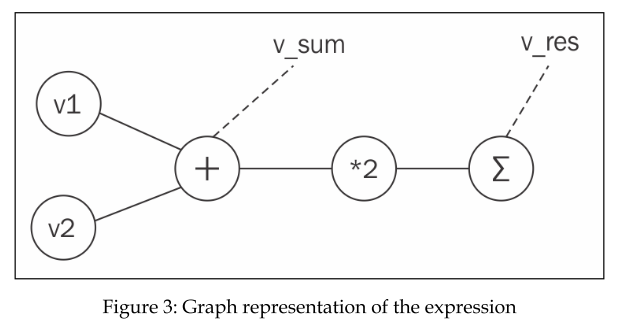

This generates the equsition: $\Sigma (2*(v1 + v2))$

In [14]:
v1 = torch.tensor([1.0, 1.0], requires_grad=True) #Requiers gradient calculation
v2 = torch.tensor([2.0, 2.0]) #Doens't requier gradient calculation

v_sum = v1 + v2 #Adding two tensors element wise
v_res = (v_sum*2).sum() #sum all elements of the result tensor
v_res 

tensor(12., grad_fn=<SumBackward0>)

In [18]:
v1.is_leaf, v2.is_leaf #both v1 and v2 are leaves

(True, True)

In [19]:
v_sum.is_leaf, v_res.is_leaf #v_sum and v_res tensors are not leaves 

(False, False)

In [21]:
v1.requires_grad, v2.requires_grad #v1 requires gradient calculation, v2 doesn't

(True, False)

In [22]:
v_sum.requires_grad, v_res.requires_grad #v_sum and v_res require gradient calc

(True, True)

#### Claculating the gradient of the graph
By calling the backward function, we asked PyTorch to calculate the numerical derivative of the v_res variable, with respect to any variable that our graph has. In other words, what influence do small changes to the v_res variable have on the rest of the graph? In our particular example, the value of 2 in v1's gradients means that by increasing every element of v1 by one, the resulting value of v_res will grow by two.

In [23]:
v_res.backward() #Gradient is calulated by using the backword() method on the result tensor
v1.grad

tensor([2., 2.])

In [26]:
v2.grad  #produces nothing since gradiant calculation wasn't require


## NN Building Blocks
In the torch.nn package, you'll find tons of predefined classes providing you with the basic functionality blocks. All of them are designed with practice in mind (for example, they support minibatches, have sane default values, and the weights are properly initialized). All modules follow the convention of callable, which means that the instance of any class can act as a function when applied to its arguments. For example, the Linear class implements a feed-forward layer with optional bias (no hidden layer):

In [4]:
import torch.nn as nn 
l = nn.Linear(2,5) #creating a ff neural netwoek with 2 inputs and 5 outputs - randomly initialzed
v = torch.FloatTensor([[1, 2],[3,4],[5,4]]) #crearting a float tensor with two 3x2 to be used as an input
print('Input:\n',v)
print('Output:\n:', l(v)) #applying the nn on the tensor

Input:
 tensor([[1., 2.],
        [3., 4.],
        [5., 4.]])
Output:
: tensor([[-1.3335,  0.3668,  1.0344, -0.6241,  0.0763],
        [-2.4327,  1.4478,  2.5842, -0.8586, -0.5701],
        [-2.7236,  1.9650,  2.7673, -1.1897, -1.6533]],
       grad_fn=<ThAddmmBackward>)



Building nn with multiple layer using the Sequential method:

In [5]:
s = nn.Sequential(
    nn.Linear(2, 5),
    nn.ReLU(),
    nn.Linear(5, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.Dropout(p=0.3),
    nn.Softmax(dim=1))
s
s(torch.FloatTensor([[1,2]])) #applying the nn on our input tensor

tensor([[0.1274, 0.0833, 0.0553, 0.1001, 0.0913, 0.0913, 0.0913, 0.0913, 0.1776,
         0.0913]], grad_fn=<SoftmaxBackward>)

## Custom Layers

PyTorch nn.Module not only a unifying parent for the existing layers—it's much more than that. By subclassing the nn.Module class, you can create your own building blocks which can be stacked together, reused later, and integrated into the PyTorch framework flawlessly.
At its core, nn.Module provides quite rich functionality to its children: 

* It tracks all submodules that the current module includes. For example, your building block can have two feed-forward layers used somehow to perform the block's transformation.
* It provides functions to deal with all **parameters** of the registered submodules. You can obtain a full list of the module's parameters (parameters() method), zero its gradients (zero_grads() method), move to CPU or GPU (to(device) method), **serialize and deserialize** the module (state_dict() and load_state_dict()), and even perform **generic transformations** using your own callable (apply() method).
* It establishes the convention of module application to data. Every module needs to perform its data transformation in the forward() method by overriding it.
* There are some more functions, such as the ability to **register a hook function to tweak module transformation or gradients flow**, but it's more for advanced use cases.

These functionalities allow us to **nest our submodels into higher-level models in a unified way**, which is extremely useful when dealing with complexity. It could be a simple one-layer linear transformation or a 1001-layer ResNet monster, but if they follow the conventions of nn.Module, then both of them could be handled in the same way. This is very handy for code simplicity and reusability.

To make our life simpler, when following the preceding convention, PyTorch authors simplified the creation of modules by careful design and a good dose of Python magic. So, to create a custom module, we usually have to do only two things: 

* register submodules
* implement the forward() method

Let's look at how this can be done for our **Sequential** example from the previous section, but in a more generic and reusable way (full sample is Chapter03/01_modules.py):



In [6]:
class OurModule(nn.Module): #Creating a new class that inherits from nn.Modules
    #This is defing the condtractor method: 
    def __init__(self, num_inputs, num_classes, dropout_prob=0.3): #parmaters: the size of input, size of output, and optional dropout probability
        super(OurModule, self).__init__() #Calling the parent constructor to let it initialize itself 
        self.pipe = nn.Sequential( #Create a sequential nn and assigned it to a class filed pipe, this autmaticlly register this module
            nn.Linear(num_inputs, 5), 
            nn.ReLU(),
            nn.Linear(5, 20), 
            nn.ReLU(),
            nn.Linear(20, num_classes), 
            nn.Dropout(p=dropout_prob), 
            nn.Softmax(dim = 1) #normalzing results to produce probabilties (dividing by the sume of all outputs)
        )
    #override the forward function in nn.Module with our implementation of data transformation.
    def forward(self, x): 
        return self.pipe(x) #call the module as callable


#Using our newly created module (of the ff nn)
if __name__ == "__main__":
    net = OurModule(num_inputs=2, num_classes=3) #create a module, with 2 inputs ans 3 outputs into a net variable
    v = torch.FloatTensor([[1, 2],[3,4],[5,4]]) #crearting a float tensor with two 3x2 to be used as an input
    out = net(v) #apply the network on the input
    print('The network is:\n', net)
    print('The input is:\n', v)    
    print('The output is:\n',out)

The network is:
 OurModule(
  (pipe): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
    (5): Dropout(p=0.3)
    (6): Softmax()
  )
)
The input is:
 tensor([[1., 2.],
        [3., 4.],
        [5., 4.]])
The output is:
 tensor([[0.2486, 0.3657, 0.3858],
        [0.2044, 0.2044, 0.5913],
        [0.1250, 0.4479, 0.4271]], grad_fn=<SoftmaxBackward>)


## Loss Functions and Optimizers

Loss functions reside in the nn package and are implemented as an nn.Module subclass. Usually, they accept two arguments: 

* output from the network (prediction)
* desired output (ground-truth data which is also called the label of the data sample)

Currently PyTorch 0.4 contains 17 different loss functions. 
The most commonly used are:

* **nn.MSELoss**: The mean square error between arguments, which is the standard loss for regression problems
* **nn.BCELoss** and nn.BCEWithLogits: Binary cross-entropy loss. The first version expects a single probability value (usually it's the output of the Sigmoid layer), while the second version assumes raw scores as input and applies Sigmoid itself. The second way is usually more numerically stable and efficient. These losses (as their names suggest) are frequently used in binary classification problems.
* **nn.CrossEntropyLoss** and **nn.NLLLoss**: Famous "maximum likelihood" criteria, which is used in multi-class classification problems. The first version expects raw scores for each class and applies LogSoftmax internally, while the second expects to have log probabilities as the input.

There are other loss functions that are avialable and you can write your own too.

### Optimizers

The responsibility of the basic optimizer is to take gradients of model parameters and change these parameters, in order to decrease loss value. By decreasing loss value, we're pushing our model towards desired outputs, which can give us hope of better model performance in the future. "Change parameters" may sound simple, but there are lots of details here and the optimizer procedure is still a hot research topic. In the **torch.optim** package, PyTorch provides lots of popular optimizer implementations and the most widely known are as follows:

* **SGD**: A vanilla stochastic gradient descent algorithm with optional momentum extension
* **RMSprop**: An optimizer, proposed by G. Hinton
* **Adagrad**: An adaptive gradients optimizer

All optimizers expose the unified interface, which makes it easy to experiment with different optimization methods . On construction, you need to pass an iterable of Variables, which will be modified during the optimization process. The usual practice is to pass the result of the params() call of the upper-level nn.Module instance, which will return an iterable of all leaf Variables with gradients.

### Blue print for nn training loop
Usually, you iterate over your data over and over again.
One iteration over a full set of examples is called an **epoch**.
Data is usually too large to fit into CPU or GPU memory at once, so it is split into **batches of equal size**. 
Every batch includes data samples and target labels, and both of them **have to be tensors** ). 

You pass data samples to your network (line 4) and feed its output and target labels to the loss function (line 5). The result of the loss function shows the "badness" of the network result relative to the target labels. 
As input to the network and the network's weights are tensors, all transformations of your network are nothing more than a graph of operations with intermediate tensor instances. 

The same is true for the loss function: its result is also a tensor of one single loss value. Every tensor in this computation graph remembers its parent, so to calculate gradients for the whole network, all you need to do is to call the backward() function on a loss function result (line 6).

The result of this call will be the unrolling of the graph of the performed computations and the calculating of gradients for every leaf tensor with require_ grad=True. Usually, such tensors are our model's parameters, such as weights and biases of feed-forward networks, and convolution filters. Every time a gradient is calculated, it is accumulated in the tensor.grad field, so one tensor can participate in a transformation multiple times and its gradients will be properly summed up together. For example, one single RNN cell could be applied to multiple input items.

After the loss.backward() call is finished, we have the gradients accumulated, and now it's time for the optimizer to do its job: it takes all gradients from the parameters we've passed to it on construction and applies them. All this is done with the method step() (line 7).

The last, but not least, piece of the training loop is our responsibility to zero gradients of parameters. It can be done by calling zero_grad() on our network, but, for our convenience, optimizer also exposes such a call, which does the same thing (line 8). Sometimes zero_grad() is placed at the beginning of the training loop, but it doesn't matter much.
This scheme is a very flexible way to perform optimization and can fulfill the requirements even in sophisticated research. For example, you can have two optimizers tweaking the options of different models on the same data (and this is a real-life scenario from GAN training).


In [7]:

#TODO: 
# Implement iterate_batches()
# Create a data and lables example
# Work with GPUs


from torch.utils.data import Dataset, DataLoader #These are pytorch utils to handle input data
import torch.optim as optim #pytorch utils for optimizing gradients

#Defining a class that inherits from the Dataset class from torch.utils.data
#The demo class producess a random data set as tensor of n row x m clos/inputs, and num classses outputs
class DemoData(Dataset):
    #Overiding the _init_methid 
    def __init__(self, rows = 10 ,cols = 10, num_classes = 2, transform=None):
        #Creating a tensor filled with random data
        self.data = torch.FloatTensor( np.random.rand(rows, cols)) #
        #Generating random labels as [0,0,..,1,..,0]
        x = np.random.randint(0, num_classes, size = rows)
        labels = torch.zeros((rows, num_classes))
        labels[list(range(0, rows)), [x]] = 1
        self.labels = labels
        #
        self.len = self.data.shape[0]
        self.transform = transform

    #method to return the length (number of rows) of the dataset
    def __len__(self):
        return self.len

    #Method to return the next row from t
    def __getitem__(self, idx):
        sample = self.data[idx] 
        labels = self.labels[idx]
        if self.transform: #Data transformation if needed
            sample, lablels= self.transform(sample), self.labels[idx]
        return sample, labels
    
    #Method to return the entire data in a tnsor
    def getdata(self):
        return self.data
    #Method to return the entire labels set in a tnsor
    def getlabels(self):
        return self.labels

#Executing a training loop
#==========================
inputs = 10 #number of inputs/features
classes = 2 #Number of output 
sample_size = 1000 #Number of rows in the data

net = OurModule(num_inputs= inputs, num_classes = classes) #create a module, with ninputs and m outputs into a net variable
loss_function = nn.MSELoss() #Setting up the loss function
# Setting up a Sochastic Gradient Descent optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)
#Creatig an instanse of the DemoData class the returns generated random data 
data = DemoData(rows = sample_size, cols = inputs, num_classes = classes)
#print(data.getdata()) #Printing the entire data set
#print(data.getlabels()) #Printing the entire label set
iterate_batches = DataLoader(data, batch_size = 32, shuffle = True, ) #DataLoder is a class the generates the mimibatches based on the input data

#  training loop - single epoch - runing one time over the dataset
#=================
#for batch_samples, batch_labels in iterate_batches():
for i, minibatch in enumerate(iterate_batches):  #Creating enumarator from the iterate_batches object that returns mini batch data object
    #print(data) #minibatch is a a list that includes 2 tensors: data tensor of the minibatch and tesnor for the labels
    batch_samples_t, batch_labels_t = minibatch #Seperating the datalist to 
    out_t = net(batch_samples_t) #apply the n.net on the input 
    loss_t= loss_function(out_t, batch_labels_t) #Feed to the loss function with the nn output and the associate lables
    #loss_t is a tensor with one element that qunitify the loss
    print('Loss: ',round(loss_t.item(),3))#Print the loss
    loss_t.backward() #apply back propogation metod on the loss tensor - it will execute the back propogation
    optimizer.step() #apply all the gradients on the nn's weights and parameters
    optimizer.zero_grad() #Zero all gradients

#Print and example of output after the training has completed
print('input:',batch_samples_t)
print('labels:', batch_labels_t)
print('out_t:',out_t)




Loss:  0.268
Loss:  0.277
Loss:  0.27
Loss:  0.261
Loss:  0.231
Loss:  0.245
Loss:  0.306
Loss:  0.254
Loss:  0.229
Loss:  0.303
Loss:  0.258
Loss:  0.287
Loss:  0.284
Loss:  0.272
Loss:  0.252
Loss:  0.258
Loss:  0.237
Loss:  0.252
Loss:  0.262
Loss:  0.276
Loss:  0.228
Loss:  0.296
Loss:  0.25
Loss:  0.248
Loss:  0.268
Loss:  0.256
Loss:  0.249
Loss:  0.249
Loss:  0.267
Loss:  0.251
Loss:  0.25
Loss:  0.344
input: tensor([[0.0378, 0.6766, 0.7117, 0.7296, 0.3542, 0.2043, 0.0546, 0.9101, 0.2384,
         0.8831],
        [0.2010, 0.0755, 0.5776, 0.1701, 0.5229, 0.7685, 0.0847, 0.9048, 0.4502,
         0.8977],
        [0.7981, 0.9999, 0.8027, 0.5019, 0.3014, 0.2443, 0.1229, 0.3433, 0.6020,
         0.8595],
        [0.3623, 0.9464, 0.1979, 0.1870, 0.5191, 0.7156, 0.6271, 0.2613, 0.0232,
         0.2354],
        [0.8810, 0.3998, 0.0223, 0.1715, 0.7479, 0.3801, 0.6400, 0.2935, 0.3230,
         0.8530],
        [0.0320, 0.7425, 0.2183, 0.0706, 0.9169, 0.9619, 0.1438, 0.5488, 0.0109,
    

### TensorBoard 101


Since there are many parameters that are controling the result of the NN training process. There are few things that meed to be observed during training:

* loss value, which normally consists of several components like base loss and regularization losses. You should monitor both total loss and individual components over time
* Results of validation on training and test set
* Statistics about gradients and weights
* Learning rates and other hyperparameters, if they are adjusted over time

The list could be much longer and include domain-specific metrics, such as word embeddings' projections, audio samples, and images generated by GAN. You also may want to monitor values related to training speed, like how long an epoch takes, to see the effect of your optimizations or problems with hardware.
To make a long story short, you need a generic solution to track lots of values over time and represent them for analysis, preferably developed specially for DL (just imagine looking at such statistics in an Excel spreadsheet). Luckily, such tools exist.

TensorFlow included a special tool called TensorBoard, developed to solve the problem we are talking about: how to observe and analyze various NN characteristics over training. TensorBoard is a powerful, generic solution with a large community and it looks quite pretty:

From the architecture point of view, TensorBoard is a Python web service which you can start on your computer, passing it the directory where your training process will save values to be analyzed. Then you point your browser to TensorBoard's port (usually 6006), and it shows you an interactive web interface with values updated in real-time. It's nice and convenient, especially when your training is performed on a remote machine somewhere in the cloud.
Originally, TensorBoard was deployed as a part of TensorFlow, but recently, it has been moved to a separate project (it's still being maintained by Google) and has its own package name. However, TensorBoard still uses the TensorFlow data format, so to be able to write training statistics from PyTorch optimization, you'll need both the tensorflow and tensorflow-tensorboard packages installed. As TensorFlow depends on TensorBoard, to install both, you need to run pip install tensorflow in your virtual environment.

In theory, this is all you need to start monitoring your networks, as the tensorflow package provides you with classes to write the data that TensorBoard will be able to read. However, it's not very practical, as those classes are very low level. To overcome this, there are several third-party open-source libraries that provide a convenient high-level interface. One of my favorites, which is used in this book, is tensorboard-pytorch (https://github.com/lanpa/tensorboard-pytorch). It can be installed with pip install tensorboard-pytorch.

Here is a **simple example** for plotting on Tensorboard:
We import the required packages, create a writer of data, and define functions that we're going to visualize. By default, ``SummaryWriter`` will create a unique directory under the runs directory for every launch, to be able to compare different launches of training. Names of the new directory include the current date and time, and hostname. To override this, you can pass the ``log_dir`` argument to ``SummaryWriter``. You also can add a suffix to the name of the directory by passing a comment option, for example to capture different experiments' semantics, such as ``dropout=0.3`` or ``strong_regularisation``.
Here, we loop over angle ranges in degrees, convert them into radians, and calculate our functions' values. Every value is being added to the writer using the add_scalar function, which takes three arguments: the name of the parameter, its value, and the current iteration (which has to be an integer).
The last thing we need to do after the loop is to close the writer. Note that the writer does a periodical flush (by default, every two minutes), so even in the case of a lengthy optimization process, you still will see your values.

In [19]:
import math
from tensorboardX import SummaryWriter #import the tensorboardX package

if __name__ == "__main__": 
    writer = SummaryWriter() #will create a unique directory under the runs directory for every launch, to be able to compare different launches of training
    funcs = {"sin": math.sin, "cos": math.cos, "tan": math.tan} #Creating a dictionary of math function, keys and values

    for angle in range(-360, 360): #over all integer angels 
        angle_rad = angle * math.pi / 180 #calculatin radian
        for name, fun in funcs.items(): #over all key/values in the funcs dict.
            val = fun(angle_rad) #claculating the function output (e.g sin(angel), cos(angel), tan(angel))
            writer.add_scalar(name, val, angle) # Every value is being added to the writer using the add_scalar function, which takes three arguments: the name of the parameter, its value, and the current iteration (which has to be an integer).
    writer.close() #close the writer at the end of the loop
    

The result of running this will be zero output on the console, but you will see a new directory created inside the runs directory with a single file. 
To look at the result, we need to start TensorBoard:
Type the command:

``$ cd <local runing directory``
``$ tensorboard --logdir .\runs --host localhost``

TensorBoard 0.1.7 at http://localhost:6006
(Press CTRL+C to quit)

Now you can open http://localhost:6006 in your browser to see something like this:

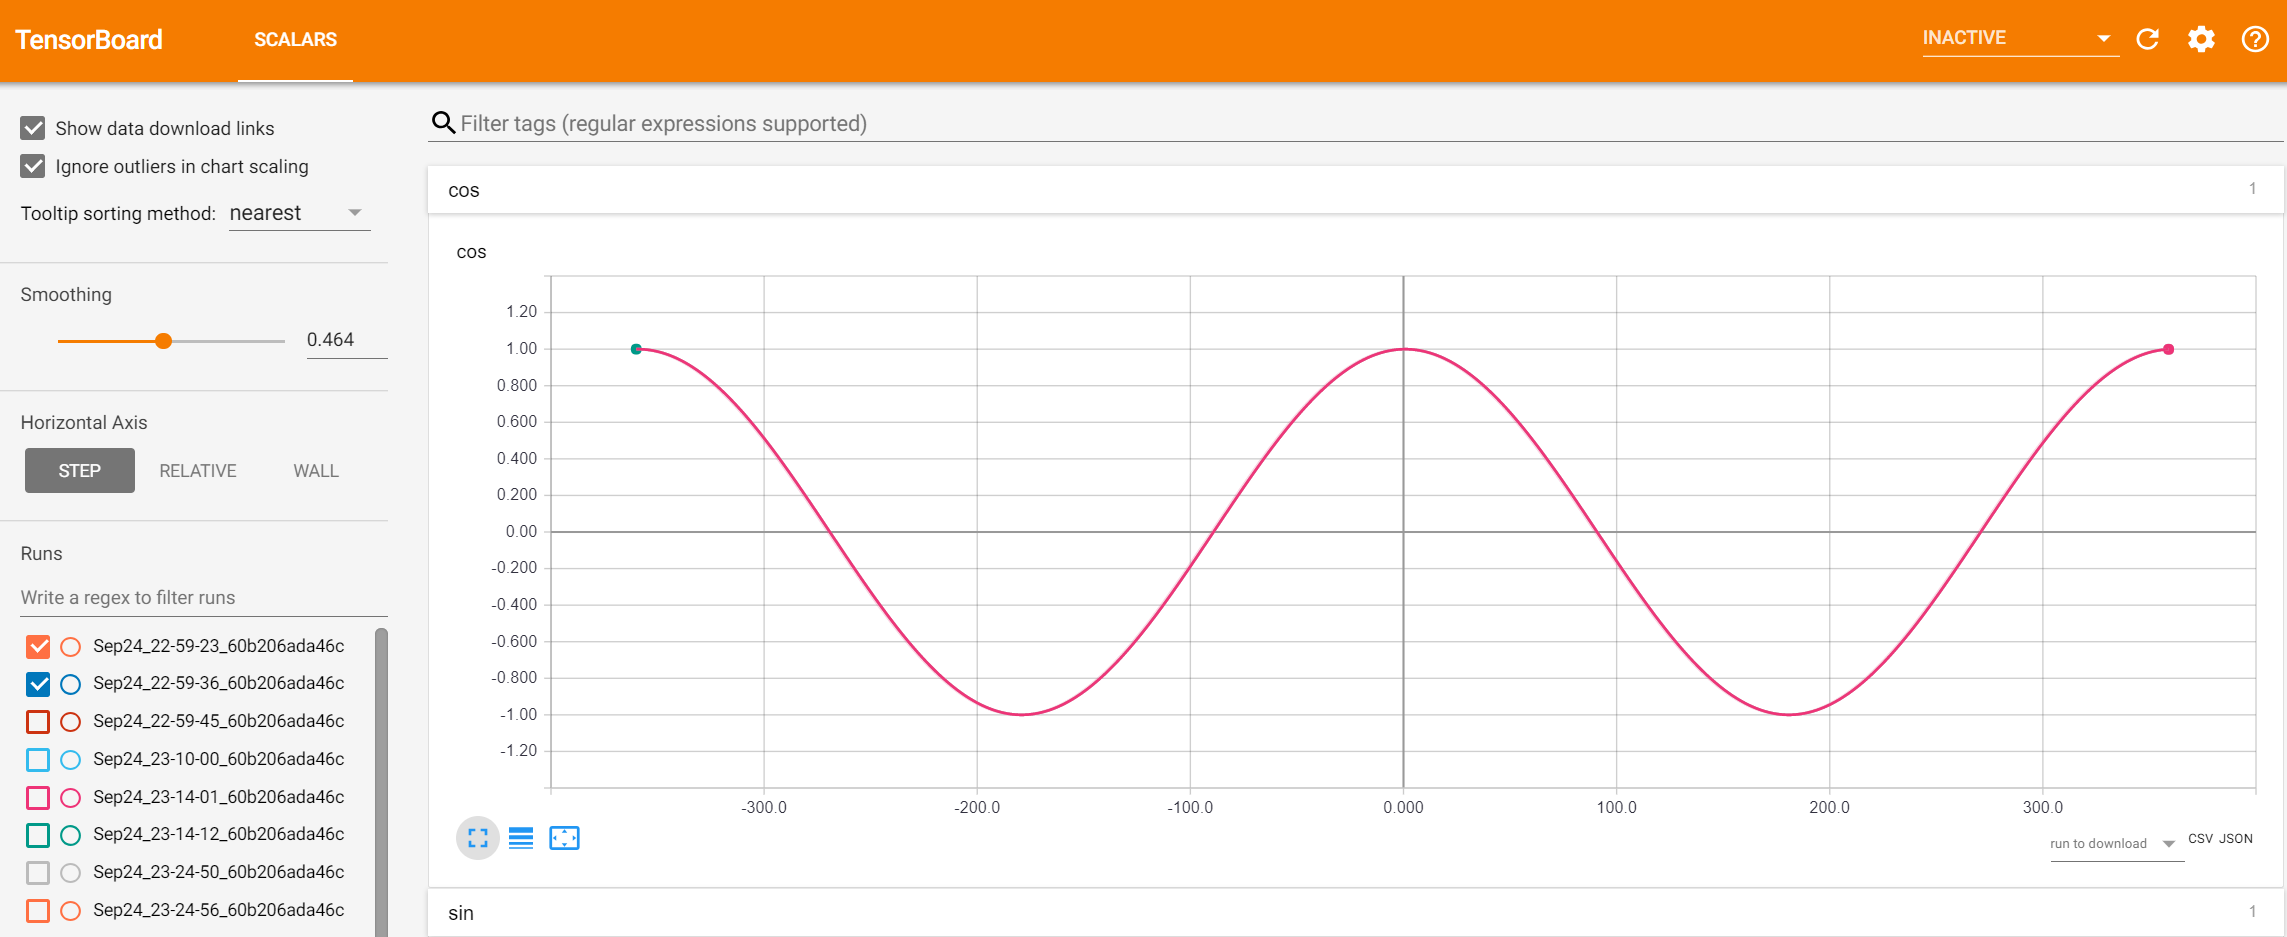


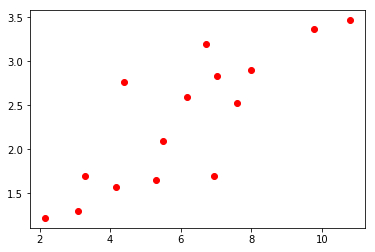

In [7]:
import matplotlib.pyplot as plt
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

plt.plot(x_train, y_train, 'ro', label='Original data')

In [34]:
 for a in range(-360, 360):
        print(a)

-360
-359
-358
-357
-356
-355
-354
-353
-352
-351
-350
-349
-348
-347
-346
-345
-344
-343
-342
-341
-340
-339
-338
-337
-336
-335
-334
-333
-332
-331
-330
-329
-328
-327
-326
-325
-324
-323
-322
-321
-320
-319
-318
-317
-316
-315
-314
-313
-312
-311
-310
-309
-308
-307
-306
-305
-304
-303
-302
-301
-300
-299
-298
-297
-296
-295
-294
-293
-292
-291
-290
-289
-288
-287
-286
-285
-284
-283
-282
-281
-280
-279
-278
-277
-276
-275
-274
-273
-272
-271
-270
-269
-268
-267
-266
-265
-264
-263
-262
-261
-260
-259
-258
-257
-256
-255
-254
-253
-252
-251
-250
-249
-248
-247
-246
-245
-244
-243
-242
-241
-240
-239
-238
-237
-236
-235
-234
-233
-232
-231
-230
-229
-228
-227
-226
-225
-224
-223
-222
-221
-220
-219
-218
-217
-216
-215
-214
-213
-212
-211
-210
-209
-208
-207
-206
-205
-204
-203
-202
-201
-200
-199
-198
-197
-196
-195
-194
-193
-192
-191
-190
-189
-188
-187
-186
-185
-184
-183
-182
-181
-180
-179
-178
-177
-176
-175
-174
-173
-172
-171
-170
-169
-168
-167
-166
-165
-164
-163
-162
-161
